In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split

In [3]:
weather_data = pd.read_csv('data/weatherHistory.csv')
weather_data.head()

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.


In [4]:
weather_data.isnull().sum()

Formatted Date                0
Summary                       0
Precip Type                 517
Temperature (C)               0
Apparent Temperature (C)      0
Humidity                      0
Wind Speed (km/h)             0
Wind Bearing (degrees)        0
Visibility (km)               0
Loud Cover                    0
Pressure (millibars)          0
Daily Summary                 0
dtype: int64

In [5]:
weather_data['Formatted Date'] = pd.to_datetime(weather_data['Formatted Date'], errors='coerce', utc=True)
weather_data = weather_data.dropna(subset=['Formatted Date'])
weather_data['Day of Year'] = weather_data['Formatted Date'].dt.dayofyear
weather_data['Year'] = weather_data['Formatted Date'].dt.year
weather_data.head()

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary,Day of Year,Year
0,2006-03-31 22:00:00+00:00,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.,90,2006
1,2006-03-31 23:00:00+00:00,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.,90,2006
2,2006-04-01 00:00:00+00:00,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.,91,2006
3,2006-04-01 01:00:00+00:00,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.,91,2006
4,2006-04-01 02:00:00+00:00,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.,91,2006


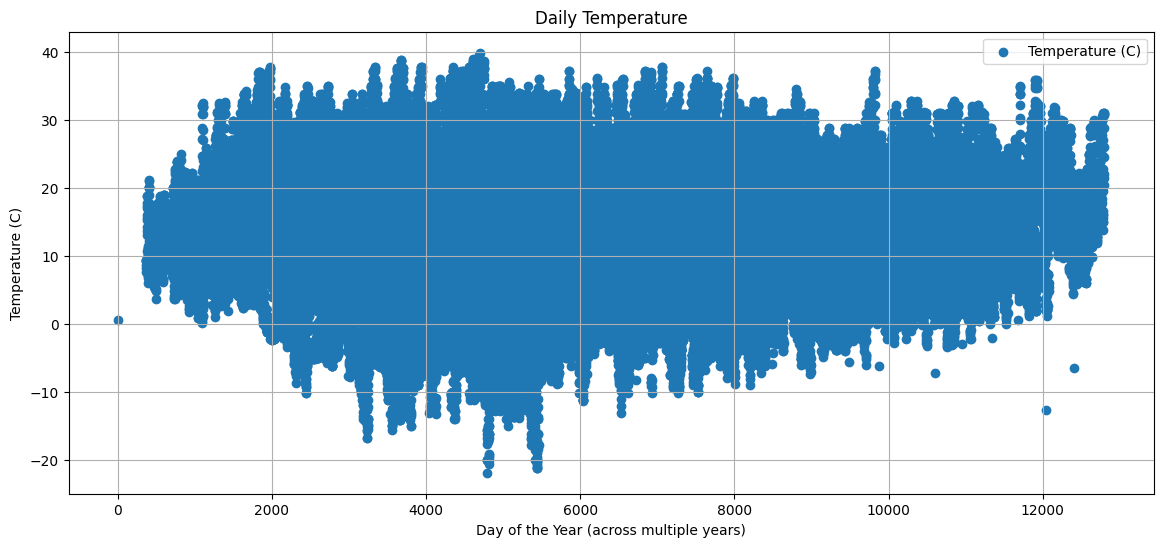

In [6]:
temperature_data = weather_data[['Day of Year', 'Year', 'Temperature (C)']].copy()
temperature_data['Continuous Day'] = temperature_data.groupby('Year').cumcount() + 1
temperature_data['Continuous Day'] += (temperature_data['Year'] - temperature_data['Year'].min()) * 365
plt.figure(figsize=(14, 6))
plt.scatter(temperature_data['Continuous Day'], temperature_data['Temperature (C)'], label='Temperature (C)')
plt.xlabel('Day of the Year (across multiple years)')
plt.ylabel('Temperature (C)')
plt.title('Daily Temperature')
plt.legend()
plt.grid(True)
plt.show()

In [7]:
daily_mean_temperature = weather_data.groupby(['Year', 'Day of Year'])['Temperature (C)'].mean().reset_index()
daily_mean_temperature.columns = ['Year', 'Day of Year', 'Mean Temperature (C)']
daily_mean_temperature = daily_mean_temperature[['Day of Year', 'Mean Temperature (C)']]
daily_mean_temperature.head()
daily_mean_temperature.shape

(4019, 2)

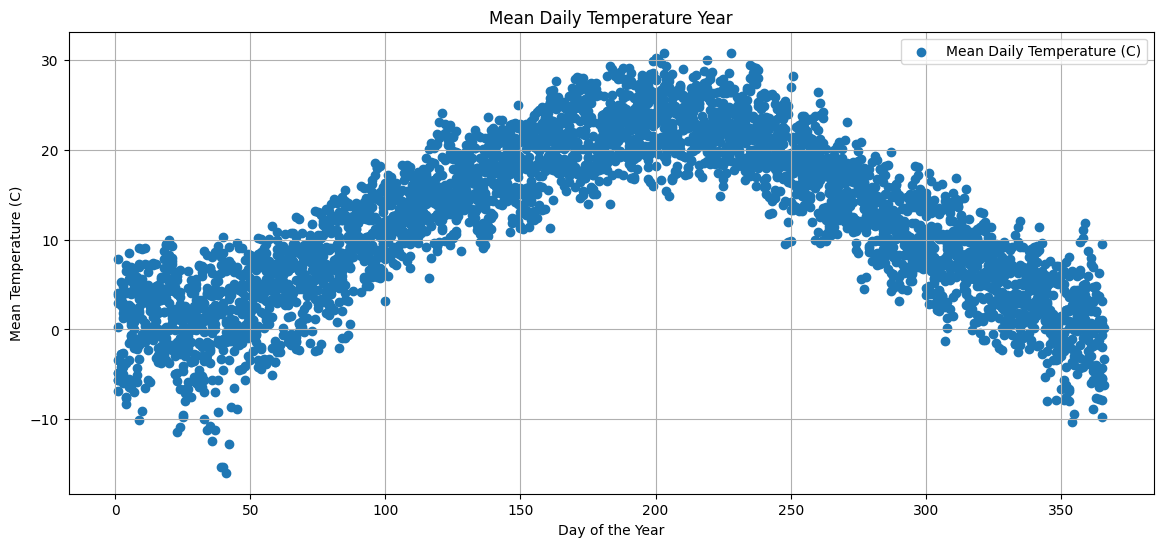

In [8]:
plt.figure(figsize=(14, 6))
plt.scatter(daily_mean_temperature['Day of Year'], daily_mean_temperature['Mean Temperature (C)'], label='Mean Daily Temperature (C)')
plt.xlabel('Day of the Year')
plt.ylabel('Mean Temperature (C)')
plt.title('Mean Daily Temperature Year')
plt.legend()
plt.grid(True)
plt.show()

In [15]:
X = daily_mean_temperature['Day of Year'].values.reshape(-1, 1)
Y = daily_mean_temperature['Mean Temperature (C)'].values

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

((3215, 1), (804, 1), (3215,), (804,))

In [17]:
model_mlp = tf.keras.models.Sequential([
    tf.keras.layers.Dense(1, activation="sigmoid"),
    tf.keras.layers.Dense(32, activation="relu"),
    tf.keras.layers.Dense(16, activation="relu"),
    tf.keras.layers.Dense(1, activation="linear")
])

In [18]:
model_mlp.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
              loss="mse",)

In [19]:
output_mlp = model_mlp.fit(X_train, Y_train, epochs=500)

Epoch 1/500
101/101 ━━━━━━━━━━━━━━━━━━━━ 1s 760us/step - loss: 220.0332
Epoch 2/500
101/101 ━━━━━━━━━━━━━━━━━━━━ 0s 922us/step - loss: 216.3519
Epoch 3/500
101/101 ━━━━━━━━━━━━━━━━━━━━ 0s 770us/step - loss: 213.0877
Epoch 4/500
101/101 ━━━━━━━━━━━━━━━━━━━━ 0s 760us/step - loss: 215.7912
Epoch 5/500
101/101 ━━━━━━━━━━━━━━━━━━━━ 0s 748us/step - loss: 217.1921
Epoch 6/500
101/101 ━━━━━━━━━━━━━━━━━━━━ 0s 780us/step - loss: 212.1629
Epoch 7/500
101/101 ━━━━━━━━━━━━━━━━━━━━ 0s 750us/step - loss: 205.1736
Epoch 8/500
101/101 ━━━━━━━━━━━━━━━━━━━━ 0s 758us/step - loss: 206.9110
Epoch 9/500
101/101 ━━━━━━━━━━━━━━━━━━━━ 0s 830us/step - loss: 198.0425
Epoch 10/500
101/101 ━━━━━━━━━━━━━━━━━━━━ 0s 754us/step - loss: 196.3143
Epoch 11/500
101/101 ━━━━━━━━━━━━━━━━━━━━ 0s 752us/step - loss: 195.0622
Epoch 12/500
101/101 ━━━━━━━━━━━━━━━━━━━━ 0s 769us/step - loss: 180.8451
Epoch 13/500
101/101 ━━━━━━━━━━━━━━━━━━━━ 0s 750us/step - loss: 177.9385
Epoch 14/500
101/101 ━━━━━━━━━━━━━━━━━━━━ 0s 773us/step - lo

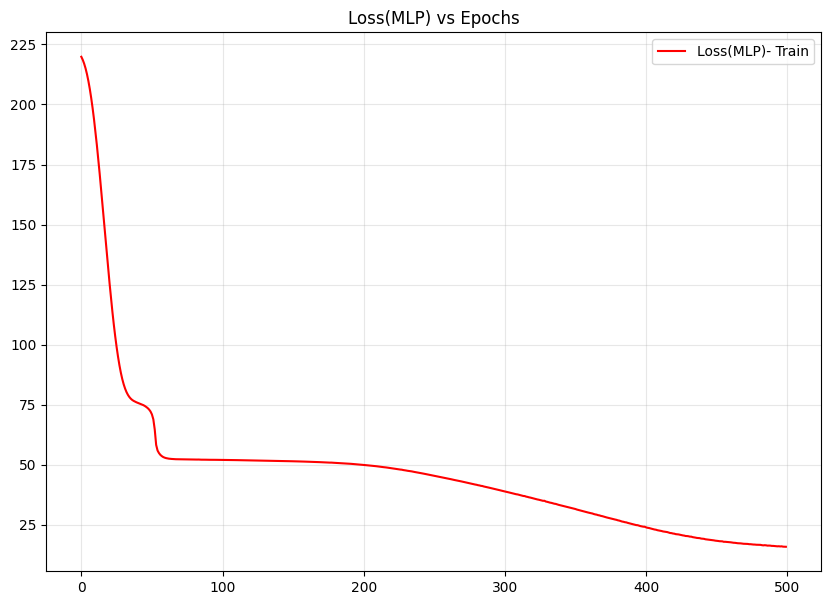

In [21]:
plt.figure(figsize=(10, 7))
plt.plot(output_mlp.history["loss"], label="Loss(MLP)- Train", color='red')
plt.title("Loss(MLP) vs Epochs")
plt.grid(alpha=0.3)
plt.legend()
plt.show()

In [35]:
loss_mlp = model_mlp.evaluate(X_test, Y_test)
print("Loss of MLP is:", round(loss_mlp, 2))

26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 16.4407 
Loss of MLP is: 15.35


In [23]:
Y_pred_mlp = model_mlp.predict(X_test)
Y_pred_mlp.shape

26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


(804, 1)

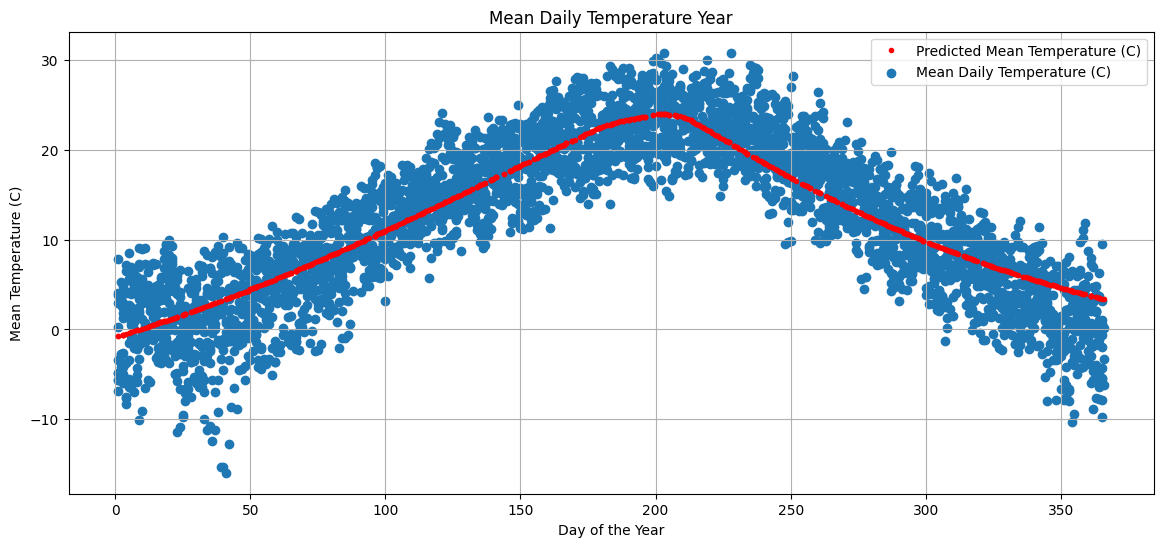

In [26]:
plt.figure(figsize=(14, 6))
plt.plot(X_test, Y_pred_mlp,'.', color='red', label='Predicted Mean Temperature (C)')
plt.scatter(daily_mean_temperature['Day of Year'], daily_mean_temperature['Mean Temperature (C)'], label='Mean Daily Temperature (C)')
plt.xlabel('Day of the Year')
plt.ylabel('Mean Temperature (C)')
plt.title('Mean Daily Temperature Year')
plt.legend()
plt.grid(True)
plt.show()

In [27]:
model_perceptron = tf.keras.models.Sequential([
    tf.keras.layers.Dense(1, activation="linear")
])

In [28]:
model_perceptron.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
                loss="mse",)

In [29]:
output_perceptron = model_perceptron.fit(X_train, Y_train, epochs=500)

Epoch 1/500
101/101 ━━━━━━━━━━━━━━━━━━━━ 0s 675us/step - loss: 106782.7891
Epoch 2/500
101/101 ━━━━━━━━━━━━━━━━━━━━ 0s 651us/step - loss: 104790.4844
Epoch 3/500
101/101 ━━━━━━━━━━━━━━━━━━━━ 0s 636us/step - loss: 104259.3281
Epoch 4/500
101/101 ━━━━━━━━━━━━━━━━━━━━ 0s 673us/step - loss: 102648.7891
Epoch 5/500
101/101 ━━━━━━━━━━━━━━━━━━━━ 0s 657us/step - loss: 102496.4609
Epoch 6/500
101/101 ━━━━━━━━━━━━━━━━━━━━ 0s 651us/step - loss: 101227.0312
Epoch 7/500
101/101 ━━━━━━━━━━━━━━━━━━━━ 0s 660us/step - loss: 96270.6094
Epoch 8/500
101/101 ━━━━━━━━━━━━━━━━━━━━ 0s 650us/step - loss: 98764.8984
Epoch 9/500
101/101 ━━━━━━━━━━━━━━━━━━━━ 0s 666us/step - loss: 96400.5781
Epoch 10/500
101/101 ━━━━━━━━━━━━━━━━━━━━ 0s 650us/step - loss: 95464.2969
Epoch 11/500
101/101 ━━━━━━━━━━━━━━━━━━━━ 0s 654us/step - loss: 91608.5078
Epoch 12/500
101/101 ━━━━━━━━━━━━━━━━━━━━ 0s 648us/step - loss: 92034.3281
Epoch 13/500
101/101 ━━━━━━━━━━━━━━━━━━━━ 0s 702us/step - loss: 92044.8516
Epoch 14/500
101/101 ━━━━━━━

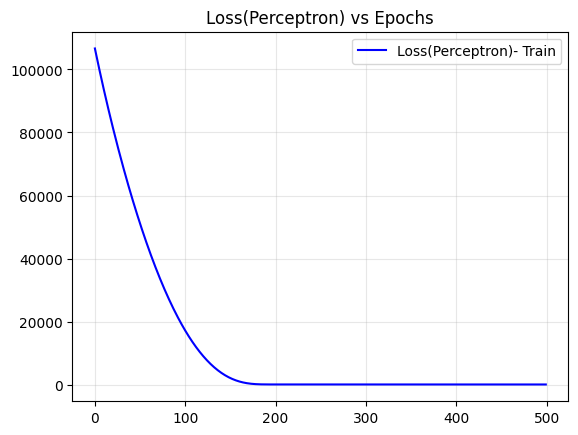

In [31]:
plt.plot(output_perceptron.history["loss"], label="Loss(Perceptron)- Train", color='blue')
plt.title("Loss(Perceptron) vs Epochs")
plt.grid(alpha=0.3)
plt.legend()
plt.show()

In [36]:
loss_perceptron = model_perceptron.evaluate(X_test, Y_test)
print("Loss of Perceptron is:", round(loss_perceptron, 2))

26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 931us/step - loss: 86.9418
Loss of Perceptron is: 85.67
